# **Python: Regresión Logística**

# **Generar datos (un predictor)**

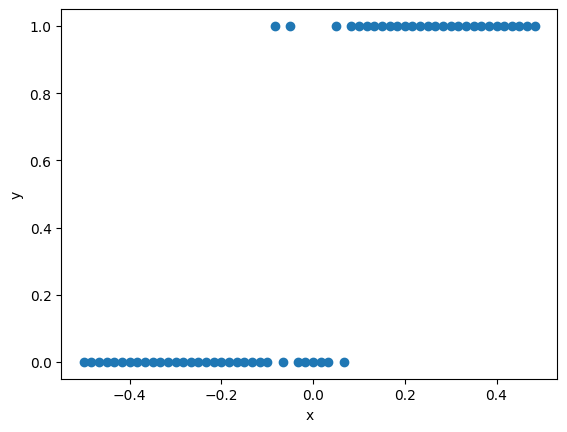

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # Sigmoid function expit(x) = 1/(1+exp(-x))

x = np.arange(-30, 30) / 60

def logit(x):
    return expit(x)

y = np.random.binomial(1, logit(10 * x))

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()



# **RL con sklearn**

Nota: sklearn trabaja por default con un término de regularización (penalty) en la función de costo (L2 o l1)

In [ ]:
from sklearn.linear_model import LogisticRegression

fit = LogisticRegression( penalty=None) # LogisticRegression(fit_intercept=True, penalty=None) el default es con intercepto
xn = x.reshape(-1, 1)
fit.fit(xn, y)

# Ajustar
y_fitted = fit.predict_proba(xn)[:, 1] # Se predice la probabilidad de cada clase




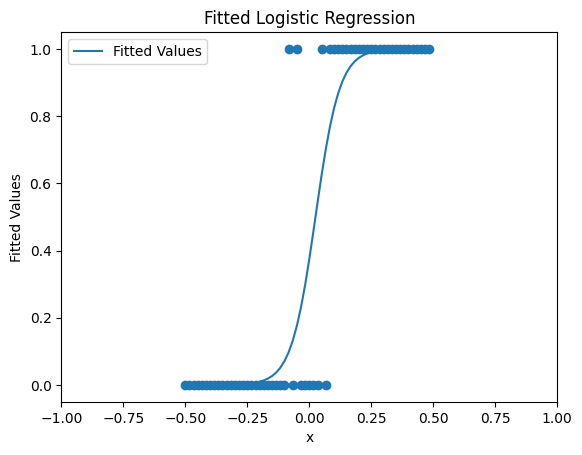

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_fitted, label="Fitted Values")
plt.xlim(-1, 1)
plt.xlabel("x")
plt.ylabel("Fitted Values")
plt.title("Fitted Logistic Regression")
plt.legend()
plt.show()

**Modelo ajustado:**

In [ ]:
fit.coef_


array([[20.58883204]])

In [ ]:
fit.intercept_

array([-0.51476718])

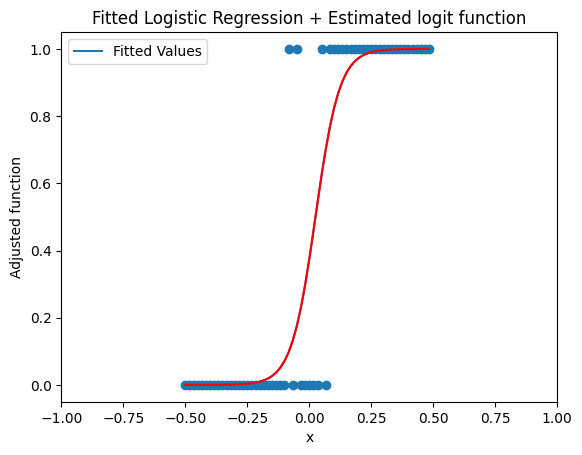

In [ ]:
plt.scatter(x, y)
plt.plot(x, y_fitted, label="Fitted Values")
plt.plot(xn,logit(fit.intercept_+fit.coef_[0]*x),color='red')
plt.xlim(-1, 1)
plt.xlabel("x")
plt.ylabel("Adjusted function")
plt.title("Fitted Logistic Regression + Estimated logit function")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
predicciones =fit.predict(xn)
yhat = list(map(round, predicciones))

In [ ]:
cm = confusion_matrix(y, yhat)
print ("\nConfusion Matrix : \n", cm)


Confusion Matrix : 
 [[30  2]
 [ 2 26]]


In [ ]:
accuracy_score(y, yhat)

0.9333333333333333

**RL con statsmodels (Logit o GLM)**
Permite obtener más información de auste y herramientas de inferencia

*En* la salida del siguiente c´digo: "deviance" corresponde a lo que en R es "residual deviance" y "Df Residuales" corresponde a "degrees of freedom" de R

In [ ]:
import statsmodels.api as sm
import statsmodels.tools as tools

xn_const = tools.add_constant(xn)

fit2 = sm.GLM(y, xn_const, family=sm.families.Binomial()).fit()
fit2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:                            GLM   Df Residuals:                       58
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9.5832
Date:                Mon, 31 Mar 2025   Deviance:                       19.166
Time:                        05:18:18   Pearson chi2:                     21.7
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6544
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5148      0.609     -0.845      0.398      -1.708       0.679
x1            20.5915      6.661      3.091      0.002       7.536      33.647
==============================================================================
"""

In [ ]:
predicciones =fit2.predict(xn_const)
yhat = list(map(round, predicciones))
cm = confusion_matrix(y, yhat)
print ("\nConfusion Matrix : \n", cm)


Confusion Matrix : 
 [[30  2]
 [ 2 26]]


**Alternativo**

In [ ]:
import statsmodels.api as sm
import statsmodels.tools as tools

# add constant to training data
xn_const = tools.add_constant(xn)
# Train the logistic regression with the training data
fit3 = sm.Logit(y, xn_const).fit()


Optimization terminated successfully.
         Current function value: 0.159720
         Iterations 9


In [ ]:
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:                          Logit   Df Residuals:                       58
Method:                           MLE   Df Model:                            1
Date:                Mon, 31 Mar 2025   Pseudo R-squ.:                  0.7688
Time:                        05:18:27   Log-Likelihood:                -9.5832
converged:                       True   LL-Null:                       -41.455
Covariance Type:            nonrobust   LLR p-value:                 1.417e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5148      0.609     -0.845      0.398      -1.708       0.679
x1            20.5915      6.661      3.091      0.002       7.536      33.647
==============================================================================
"""

In [ ]:
predicciones =fit3.predict(xn_const)
yhat = list(map(round, predicciones))
cm = confusion_matrix(y, yhat)
print ("\nConfusion Matrix : \n", cm)


Confusion Matrix : 
 [[30  2]
 [ 2 26]]


Nota: si los predictores son nominales, hay que recodificar usando por ejemplo one-hot coding  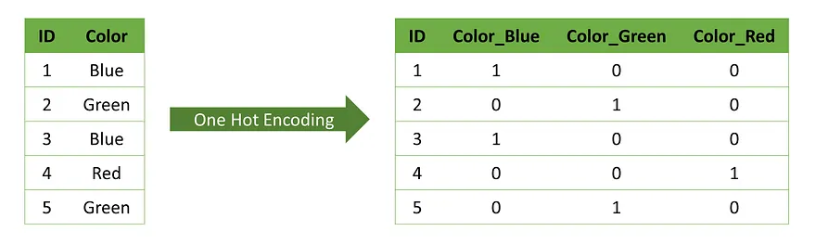

In [ ]:
pd.get_dummies(
    data= ...,
    columns=categorical,
    drop_first=True,
    dtype=int
)


# **Otros ejemplos**

In [ ]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_blobs

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np



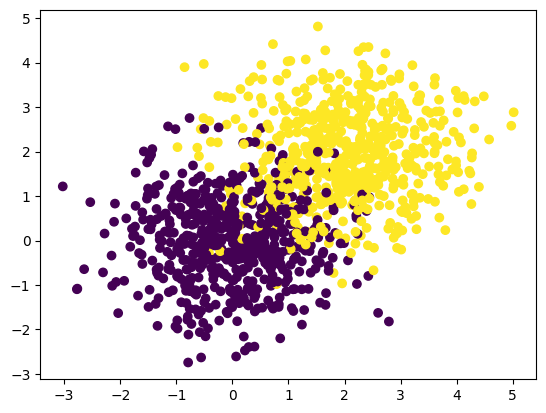

In [ ]:
n=1000
A = np.array([[1, 0], [0, 1]])
mu=np.array([2, 2])
X = np.r_[np.dot(np.random.randn(n, 2), A),
              np.dot(np.random.randn(n, 2), A) + mu]
y = np.hstack((np.zeros(n), np.ones(n)))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.show()

# **RL  usando sklearn**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
RL = LogisticRegression()


In [ ]:
mi_RL=RL.fit(X_train, y_train) # Nota: el modelo que se ajuste se saca de las columnas de la matriz de datos; cada columna es un predictor

In [ ]:
mi_RL.coef_

array([[1.89790234, 1.92293948]])

# **RL usando statsmodel**

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit(method='newton')
print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.440634
         Iterations 7
                          Results: Logit
Model:              Logit            Method:           MLE        
Dependent Variable: y                Pseudo R-squared: 0.364      
Date:               2024-04-24 18:19 AIC:              1061.5221  
No. Observations:   1200             BIC:              1071.7022  
Df Model:           1                Log-Likelihood:   -528.76    
Df Residuals:       1198             LL-Null:          -831.04    
Converged:          1.0000           LLR p-value:      1.7052e-133
No. Iterations:     7.0000           Scale:            1.0000     
---------------------------------------------------------------------
          Coef.     Std.Err.       z       P>|z|     [0.025    0.975]
---------------------------------------------------------------------
x1        0.7188      0.0679    10.5934    0.0000    0.5858    0.8518
x2        0.6270      0.0656     9.5652  

**mejor opción, más similar a R**

In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
d = pd.DataFrame({"y" : y_train,
                  "x1" : X_train[:,0],
                  "x2" : X_train[:,1] })

*En* la salida del siguiente c´digo: "deviance" corresponde a lo que en R es "residual deviance" y "Df Residuales" corresponde a "degrees of freedom" de R

In [ ]:
link_RL=sm.genmod.families.links.logit


model = smf.glm(formula = "y ~ x1+x2",
               family=sm.families.Binomial(link_RL() ),
               data=d
               ).fit()

model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1200
Model:                            GLM   Df Residuals:                     1197
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -225.32
Date:                Wed, 24 Apr 2024   Deviance:                       450.63
Time:                        18:19:57   Pearson chi2:                     995.
No. Iterations:                     7   Pseudo R-squ. (CS):             0.6356
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9087      0.278    -14.083      0.000      -4.453      -3.365
x1             1.9546      0.148     13.172      0.000       1.664       2.245
x2             1.9847      0.157     12.654      0.000       1.677       2.292
==============================================================================
"""

otro modelo

In [ ]:
link_RL=sm.genmod.families.links.logit


model = smf.glm(formula = "y ~ x1+x2+x1:x2",
               family=sm.families.Binomial(link_RL() ),
               data=d
               ).fit()

model.summary()